In [13]:
import pandas as pd
import numpy as np
file = pd.read_csv("repeaters14-18.csv", header = None)
# file

In [14]:
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import pprint

In [15]:
officer_id = file[0].unique()
category = file[1].unique()

d = {}

for i in officer_id:
    d[i] = {}
    d[i]['total'] = 0.0
    for j in category:
        d[i][j] = 0.0
# d

In [16]:
# ct = 0
for index, row in file.iterrows():
    d[row[0]][row[1]] = row[2]
    d[row[0]]['total'] += row[2]
# d

In [17]:
inputdata = pd.DataFrame.from_dict(d, orient = 'index')
inputdata

,total,Conduct Unbecoming (Off-Duty),False Arrest,Illegal Search,Lockup Procedures,Operation/Personnel Violations,Use Of Force,Verbal Abuse,Criminal Misconduct,Domestic,Traffic,Bribery / Official Corruption,Supervisory Responsibilities,Money / Property,Medical,Racial Profiling,Excessive Force,Drug / Alcohol Abuse,Unknown
60,25.0,1.0,2.0,10.0,2.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,11.0,0.0,3.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,31.0,0.0,0.0,1.0,1.0,13.0,9.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,16.0,0.0,5.0,2.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32415,10.0,0.0,1.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32423,28.0,1.0,1.0,5.0,3.0,4.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32430,22.0,1.0,2.0,7.0,0.0,2.0,3.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [18]:
mlinput = inputdata
for index, row in mlinput.iterrows():
    
    for i in range(1,18):
        row[i] = round(row[i]/row[0], 2)
mlinput

#     print(row[0])


,total,Conduct Unbecoming (Off-Duty),False Arrest,Illegal Search,Lockup Procedures,Operation/Personnel Violations,Use Of Force,Verbal Abuse,Criminal Misconduct,Domestic,Traffic,Bribery / Official Corruption,Supervisory Responsibilities,Money / Property,Medical,Racial Profiling,Excessive Force,Drug / Alcohol Abuse,Unknown
60,25.0,0.04,0.08,0.40,0.08,0.08,0.32,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
72,3.0,0.00,0.00,0.33,0.00,0.00,0.33,0.33,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
135,11.0,0.00,0.27,0.18,0.09,0.18,0.27,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
152,31.0,0.00,0.00,0.03,0.03,0.42,0.29,0.10,0.03,0.03,0.06,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
193,3.0,0.00,0.00,0.00,0.00,0.33,0.33,0.33,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,16.0,0.00,0.31,0.12,0.06,0.12,0.25,0.06,0.00,0.00,0.00,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0
32415,10.0,0.00,0.10,0.40,0.30,0.10,0.10,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
32423,28.0,0.04,0.04,0.18,0.11,0.14,0.43,0.00,0.07,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
32430,22.0,0.05,0.09,0.32,0.00,0.09,0.14,0.09,0.00,0.09,0.05,0.0,0.0,0.09,0.0,0.0,0.0,0.0,0.0


In [19]:
#Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
k_lst = [i for i in range(2,15)]
sscore_dict = {}
for k in k_lst:
    km = KMeans(n_clusters = k, n_init = 10, random_state = 123, init='k-means++', max_iter = 100, tol=0.001) #set seed 
    pred  = km.fit_predict(mlinput)
    sscore = silhouette_score(mlinput, pred, metric = 'euclidean') #need discuss
    print("S Score for {} clusters: ".format(k), sscore)
    sscore_dict[k] = sscore

S Score for 2 clusters:  0.6957305719533824
S Score for 3 clusters:  0.5813942797177692
S Score for 4 clusters:  0.5848650601702091
S Score for 5 clusters:  0.574368494188059
S Score for 6 clusters:  0.573349813294276
S Score for 7 clusters:  0.5663331600750382
S Score for 8 clusters:  0.5642153033071686
S Score for 9 clusters:  0.5467234429007518
S Score for 10 clusters:  0.5730341720996609
S Score for 11 clusters:  0.556364560220756
S Score for 12 clusters:  0.5767523614690485
S Score for 13 clusters:  0.5494897792632246
S Score for 14 clusters:  0.55296879340802


In [20]:
optimal_k = 2
km = KMeans(n_clusters = optimal_k, n_init = 10, random_state = 123, init='k-means++', max_iter = 100, tol=0.01)
km.fit(mlinput.values)

pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(km, file)

In [21]:
model = pickle.load(open('model.pkl', 'rb'))

In [22]:
mlpred = mlinput
mlpred['pred'] = model.predict(mlinput)

In [23]:
mlpred_group = mlpred.groupby('pred')
# group0 = mlpred_group.get_group(0)
# group1 = mlpred_group.get_group(1)
summary_list = []
for group in range(2):
    m = mlpred_group.get_group(group)['total'].mean()
    s = mlpred_group.get_group(group)['total'].std()
    t = len(mlpred_group.get_group(group))
    total = len(mlpred)
    group_slice = mlpred_group.get_group(group).iloc[:, 1:19]
    summary = {
        "group_id": group,
        "group_size": t,
        "group_percentage" : round(t/total, 2),
        "count_mean": m,
        "count_std": s,
        "count_95%ci" : [m - 1.96*s/(t**0.5), m + 1.96*s/(t**0.5)],
        
    }
    summary_list.append(summary)
print(summary_list)

[{'group_id': 0, 'group_size': 79, 'group_percentage': 0.14, 'count_mean': 60.64556962025316, 'count_std': 20.001306351364068, 'count_95%ci': [56.23493697564079, 65.05620226486553]}, {'group_id': 1, 'group_size': 478, 'group_percentage': 0.86, 'count_mean': 16.560669456066947, 'count_std': 9.399556234872167, 'count_95%ci': [15.718015093519902, 17.40332381861399]}]


Conduct Unbecoming (Off-Duty)     0.027848
False Arrest                      0.063797
Illegal Search                    0.206076
Lockup Procedures                 0.051646
Operation/Personnel Violations    0.242152
Use Of Force                      0.241392
Verbal Abuse                      0.060886
Criminal Misconduct               0.020380
Domestic                          0.035823
Traffic                           0.031772
Bribery / Official Corruption     0.002911
Supervisory Responsibilities      0.008481
Money / Property                  0.004557
Medical                           0.000253
Racial Profiling                  0.000253
Excessive Force                   0.000000
Drug / Alcohol Abuse              0.000759
Unknown                           0.025316
dtype: float64


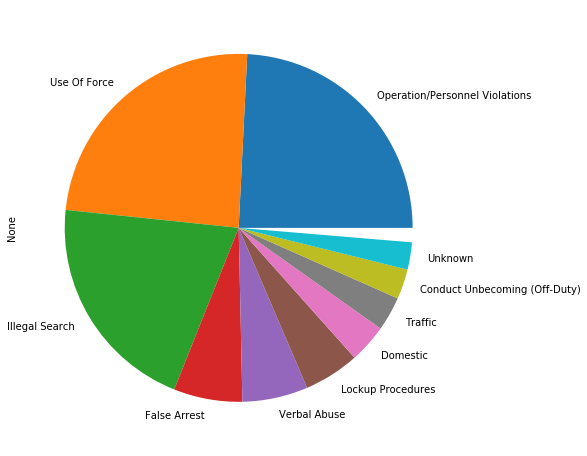

In [24]:
group_slice0 = mlpred_group.get_group(0).iloc[:, 1:19]
group_slice0.mean().sort_values(ascending=False)[:10].plot.pie(figsize=(15,8))
print(group_slice0.mean())
plt.show()

Conduct Unbecoming (Off-Duty)     0.016234
False Arrest                      0.110439
Illegal Search                    0.203138
Lockup Procedures                 0.079728
Operation/Personnel Violations    0.258138
Use Of Force                      0.200795
Verbal Abuse                      0.029791
Criminal Misconduct               0.011130
Domestic                          0.026987
Traffic                           0.031841
Bribery / Official Corruption     0.005230
Supervisory Responsibilities      0.006820
Money / Property                  0.013013
Medical                           0.000377
Racial Profiling                  0.001381
Excessive Force                   0.001025
Drug / Alcohol Abuse              0.002762
Unknown                           0.008368
dtype: float64


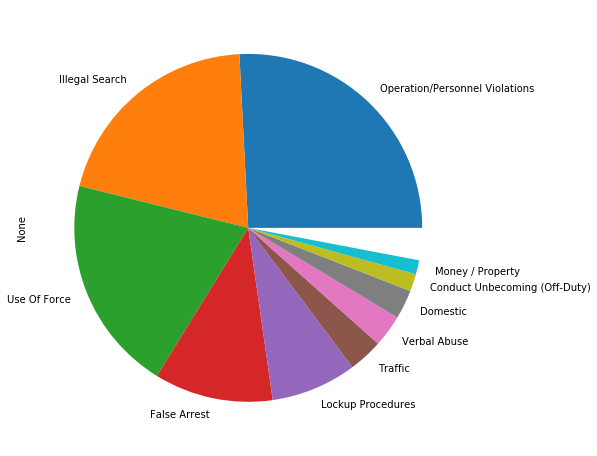

In [25]:
group_slice1 = mlpred_group.get_group(1).iloc[:, 1:19]
group_slice1.mean().sort_values(ascending=False)[:10].plot.pie(figsize=(15,8))
print(group_slice1.mean())
plt.show()

In [27]:
# # projected total numbers:

# total_thistime = mlpred['total'].sum()
# total_0_low = round(79*56.235, 1)
# total_0_high = round(79*65.056, 1)
# total_1_low = round(478*15.718, 1)
# total_1_high = round(478*17.403,1)
# print("this is the current total allegations:" + str(total_thistime))

# print("this is the projected total from the constructed Confidence Interval: Low " \
#       + str(total_0_low+total_1_low) + ' ' + "High " + str(total_0_high+total_1_high))